In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.0 MB 9.3 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 10.2 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 10.8 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 11.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.7 MB 10.7 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.7 MB 12.1 MB/s eta 0:00:01
   -------------------- ------------------- 6.6/12.7 MB 11.0 MB/s eta 0:00:01
   ---------------------------- ----------- 8.9/12.7 MB 11.5 MB/s eta 0:00:01
   ---------------------------------- ----- 11.0/12.7 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 12.7/12.7 MB 10.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

data = pd.read_csv("Crop_recommendation.csv")
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Crop_recommendation.csv'

In [3]:
import pandas as pd

data = pd.read_csv("Crop_recommendation.csv")
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

print(data.info())
print(data.describe())

sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    

ValueError: could not convert string to float: 'rice'

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Data Description:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%  

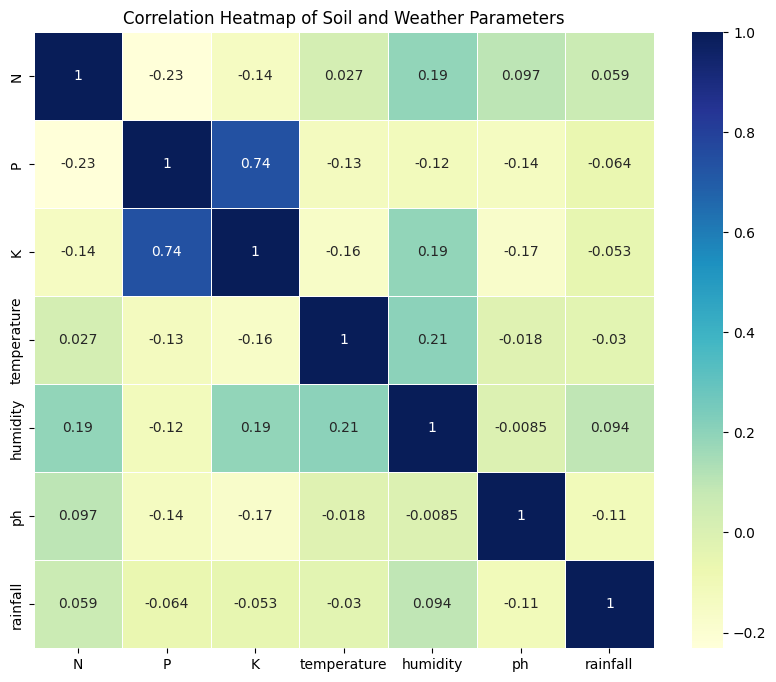

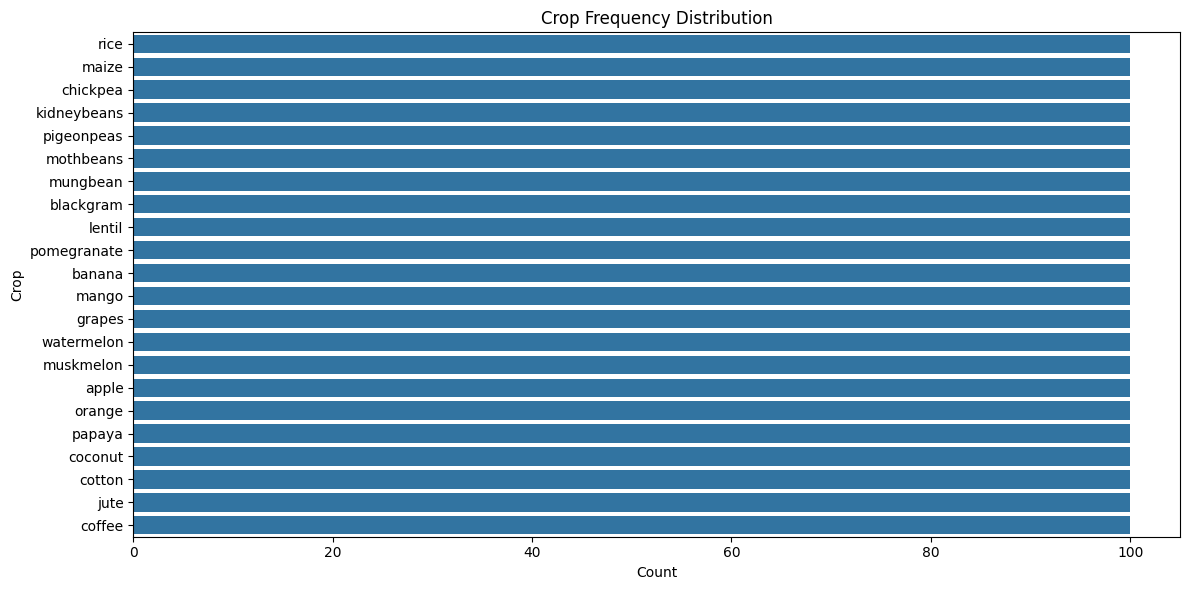

In [5]:
# 📌 Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Step 2: Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

# 📌 Step 3: Display basic information
print("Data Info:")
print(data.info())

print("\nData Description:")
print(data.describe())

print("\nFirst 5 Rows:")
print(data.head())

# 📌 Step 4: Drop non-numeric column for correlation matrix
numeric_data = data.drop('label', axis=1)

# 📌 Step 5: Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap of Soil and Weather Parameters")
plt.show()

# 📌 Step 6: Visualize frequency of each crop label
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=data, order=data['label'].value_counts().index)
plt.title("Crop Frequency Distribution")
plt.xlabel("Count")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()


In [6]:
# 📌 Step 1: Import libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# 📌 Step 2: Separate features (X) and labels (y)
X = data.drop('label', axis=1)  # Features
y = data['label']               # Target (crop name)

# 📌 Step 3: Encode crop labels (strings to numbers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Encoded labels

# 📌 Step 4: Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 📌 Step 5: Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 Step 6: Make predictions on test set
y_pred = model.predict(X_test)

# 📌 Step 7: Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


✅ Accuracy: 0.9931818181818182

Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00  

In [7]:
model.predict_proba()


TypeError: ForestClassifier.predict_proba() missing 1 required positional argument: 'X'

In [10]:
import numpy as np

def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    
    # Get probability for each crop
    probabilities = model.predict_proba(input_data)[0]  # Get first (only) row of results
    
    # Map each probability to corresponding crop label
    crop_probabilities = {
        crop: round(prob * 100, 2)  # Convert to %
        for crop, prob in zip(le.classes_, probabilities)
    }
    
    # Sort crops by highest probability
    sorted_crops = sorted(crop_probabilities.items(), key=lambda x: x[1], reverse=True)
    
    # Print all crops with percentages
    print("🌾 Crop Probabilities:")
    for crop, prob in sorted_crops:
        print(f"{crop}: {prob}%")
    
    # Return the top recommended crop
    top_crop = sorted_crops[0][0]
    print("\n✅ Recommended Crop:", top_crop)
    return top_crop


In [11]:
!pip install gradio


   ---------------------------------------- 0.0/59.6 MB ? eta -:--:--
   ---------------------------------------- 0.5/59.6 MB 3.0 MB/s eta 0:00:20
    --------------------------------------- 1.0/59.6 MB 3.1 MB/s eta 0:00:19
   - -------------------------------------- 1.6/59.6 MB 2.7 MB/s eta 0:00:22
   - -------------------------------------- 2.1/59.6 MB 2.7 MB/s eta 0:00:22
   - -------------------------------------- 2.6/59.6 MB 2.7 MB/s eta 0:00:22
   -- ------------------------------------- 3.4/59.6 MB 2.9 MB/s eta 0:00:20
   -- ------------------------------------- 3.9/59.6 MB 3.0 MB/s eta 0:00:19
   --- ------------------------------------ 5.0/59.6 MB 3.2 MB/s eta 0:00:18
   --- ------------------------------------ 5.5/59.6 MB 3.2 MB/s eta 0:00:17
   ---- ----------------------------------- 6.3/59.6 MB 3.2 MB/s eta 0:00:17
   ---- ----------------------------------- 6.6/59.6 MB 3.2 MB/s eta 0:00:17
   ----- ---------------------------------- 7.6/59.6 MB 3.2 MB/s eta 0:00:17
   ---


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import gradio as gr

# 📌 Function for prediction
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    probabilities = model.predict_proba(input_data)[0]
    
    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
    }
    
    sorted_crops = sorted(crop_probabilities.items(), key=lambda x: x[1], reverse=True)
    
    # Create display string
    result_str = "🌾 **Crop Probabilities:**\n\n"
    for crop, prob in sorted_crops:
        line = f"**{crop.title()}**: {prob}%\n"
        result_str += line
    
    top_crop = sorted_crops[0][0]
    result_str += f"\n✅ **Recommended Crop:** **{top_crop.upper()}**"
    
    return result_str

# 📌 Create interface
interface = gr.Interface(
    fn=recommend_crop_with_probabilities,
    inputs=[
        gr.Number(label="Nitrogen (N)", value=90),
        gr.Number(label="Phosphorus (P)", value=40),
        gr.Number(label="Potassium (K)", value=40),
        gr.Number(label="Temperature (°C)", value=25.0),
        gr.Number(label="Humidity (%)", value=80.0),
        gr.Number(label="pH Level", value=6.5),
        gr.Number(label="Rainfall (mm)", value=200.0),
    ],
    outputs=gr.Markdown(label="Crop Recommendation Result"),
    title="🌿 Smart Crop Advisory System",
    description="Enter your soil and environmental parameters to get crop recommendations with probabilities.",
    theme="soft"  # You can use "soft", "huggingface", or remove this line for default
)

# 📌 Launch the app
interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Created dataset file at: .gradio\flagged\dataset1.csv


In [14]:
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    # Range validation (optional but helpful)
    if not (0 <= N <= 140 and 0 <= P <= 145 and 0 <= K <= 205):
        return "❌ Please enter realistic NPK values (e.g., N: 0–140, P: 0–145, K: 0–205)."
    if not (0 <= temp <= 60 and 0 <= humidity <= 100 and 3 <= ph <= 9 and 0 <= rainfall <= 400):
        return "❌ Please enter realistic environmental values (e.g., Temp: 0–60°C, pH: 3–9, Rainfall: 0–400mm)."
    
    # Prediction
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    probabilities = model.predict_proba(input_data)[0]

    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
        if round(prob * 100, 2) > 0
    }

    sorted_crops = sorted(crop_probabilities.items(), key=lambda x: x[1], reverse=True)

    result_str = "🌾 **Crop Probabilities:**\n\n"
    for crop, prob in sorted_crops:
        result_str += f"**{crop.title()}**: {prob}%\n"

    top_crop = sorted_crops[0][0]
    result_str += f"\n✅ **Recommended Crop:** **{top_crop.upper()}**"

    return result_str


In [ ]:
import gradio as gr
import numpy as np

# 🌿 Function to predict and return sorted crop probabilities
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    try:
        input_data = np.array([[N, P, K, temp, humidity, ph, rainfall]])
        probabilities = model.predict_proba(input_data)[0]

        crop_probabilities = {
            crop: round(prob * 100, 2)
            for crop, prob in zip(le.classes_, probabilities)
            if round(prob * 100, 2) > 0
        }

        sorted_crops = sorted(crop_probabilities.items(), key=lambda x: x[1], reverse=True)

        result_str = "🌾 **Crop Probabilities:**\n\n"
        for crop, prob in sorted_crops:
            result_str += f"**{crop.title()}**: {prob}%\n"

        top_crop = sorted_crops[0][0]
        result_str += f"\n✅ **Recommended Crop:** **{top_crop.upper()}**"
        return result_str
    except Exception as e:
        return f"❌ Error: {str(e)}"


# 🌾 Farming Tips (you can add more)
farming_tips = """
### 🌟 General Farming Tips:
- Test your soil regularly to maintain nutrient balance.
- Use organic compost to improve soil structure and fertility.
- Rotate crops to prevent soil exhaustion and pest buildup.
- Avoid overwatering to prevent root rot.
- Apply fertilizers based on actual soil needs — avoid excess use.
- Monitor weather forecasts and prepare accordingly.
- Harvest at the right maturity stage to get the best yield.
"""

# ✅ Building the interface using Gradio Blocks
with gr.Blocks(theme="soft") as app:
    gr.Markdown("# 🌿 Smart Crop Advisory System")
    gr.Markdown("Enter your soil and weather conditions to get crop recommendations with probabilities.")

    with gr.Row():
        N = gr.Number(label="Nitrogen (N)", value=90)
        P = gr.Number(label="Phosphorus (P)", value=40)
        K = gr.Number(label="Potassium (K)", value=40)

    with gr.Row():
        temp = gr.Number(label="Temperature (°C)", value=25.0)
        humidity = gr.Number(label="Humidity (%)", value=80.0)
        ph = gr.Number(label="pH Level", value=6.5)
        rainfall = gr.Number(label="Rainfall (mm)", value=200.0)

    submit_btn = gr.Button("🔍 Get Recommendation")
    output = gr.Markdown()

    with gr.Accordion("🌱 Tips for Smart Farming", open=False):
        gr.Markdown(farming_tips)

    # Bind function
    submit_btn.click(fn=recommend_crop_with_probabilities,
                     inputs=[N, P, K, temp, humidity, ph, rainfall],
                     outputs=output)

# 🚀 Launch the web app
app.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("Crop_recommendation.csv")

# Prepare features and target
X = df.drop('label', axis=1)
y = df['label']

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model and label encoder
joblib.dump(model, "crop_model.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [18]:
import gradio as gr
import joblib
import numpy as np

# ✅ Load model and encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

# ✅ Crop prediction function
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temp, humidity, ph, rainfall]])
    probabilities = model.predict_proba(input_data)[0]

    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
        if round(prob * 100, 2) > 0
    }

    sorted_crops = sorted(crop_probabilities.items(), key=lambda x: x[1], reverse=True)

    result_str = "🌾 **Crop Probabilities:**\n\n"
    for crop, prob in sorted_crops:
        result_str += f"**{crop.title()}**: {prob}%\n"

    top_crop = sorted_crops[0][0]
    result_str += f"\n✅ **Recommended Crop:** **{top_crop.upper()}**"

    return result_str

# ✅ Farming tips function
def show_tips():
    tips = """
    ## 🌱 Farming Tips for Better Yield
    - ✅ Test soil regularly for nutrients and pH.
    - 💧 Use drip irrigation to conserve water.
    - 🌾 Rotate crops to maintain soil fertility.
    - 🐞 Use organic compost and biofertilizers.
    - 🚜 Mechanize farm operations where possible.
    - 🌤 Monitor weather and plan sowing accordingly.
    - 📆 Choose the best season for your selected crop.
    - 📉 Avoid overuse of chemical fertilizers and pesticides.
    """
    return tips

# ✅ Gradio Interface
with gr.Blocks(css="footer {display:none !important;} .svelte-1ipelgc, .svelte-1gfkn6j {display:none !important;}") as app:
    gr.Markdown("## 🌿 Smart Crop Advisory System")
    gr.Markdown("Enter your soil and weather parameters below to receive crop recommendations based on scientific data.")

    N = gr.Number(label="Nitrogen (N)", value=90)
    P = gr.Number(label="Phosphorus (P)", value=40)
    K = gr.Number(label="Potassium (K)", value=40)
    temp = gr.Number(label="Temperature (°C)", value=25.0)
    humidity = gr.Number(label="Humidity (%)", value=80.0)
    ph = gr.Number(label="pH Level", value=6.5)
    rainfall = gr.Number(label="Rainfall (mm)", value=200.0)

    recommend_button = gr.Button("🚀 Recommend Crop")
    tips_button = gr.Button("📋 Tips for Farming")

    output = gr.Markdown()
    tips_output = gr.Markdown()

    recommend_button.click(
        recommend_crop_with_probabilities,
        inputs=[N, P, K, temp, humidity, ph, rainfall],
        outputs=output
    )

    tips_button.click(
        show_tips,
        inputs=[],
        outputs=tips_output
    )

# ✅ Launch the app
app.launch()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
import gradio as gr
import joblib
import numpy as np

# ✅ Load model and label encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

# ✅ Crop prediction function
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    probabilities = model.predict_proba(input_data)[0]

    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
    }

    sorted_crops = sorted(
        [(crop, prob) for crop, prob in crop_probabilities.items() if prob > 0],
        key=lambda x: x[1],
        reverse=True
    )

    result_str = "🌾 **Crop Probabilities:**\n\n"
    for crop, prob in sorted_crops:
        result_str += f"**{crop.title()}**: {prob}%\n"

    top_crop = sorted_crops[0][0]
    result_str += f"\n✅ **Recommended Crop:** **{top_crop.upper()}**"

    return result_str

# ✅ Tips content
tips_text = """
### 🌱 Tips for Smart Farming:
- Use **organic compost** to enrich soil fertility.
- Practice **crop rotation** to maintain soil nutrients.
- Regularly monitor **soil pH** for optimal crop selection.
- Ensure **adequate irrigation**—not too much, not too little.
- Use **mulching** to retain soil moisture and reduce weeds.
- Stay updated with **weather forecasts**.
- Test your soil yearly for **macro and micronutrient content**.
"""

# ✅ Create Gradio interface
with gr.Blocks(css=".footer {display: none !important}") as interface:
    gr.Markdown("# 🌿 Smart Crop Advisory System")
    gr.Markdown("Enter soil and environmental parameters to get recommended crops with their probabilities.")

    with gr.Row():
        N = gr.Number(label="Nitrogen (N)", value=90)
        P = gr.Number(label="Phosphorus (P)", value=40)
        K = gr.Number(label="Potassium (K)", value=40)
    with gr.Row():
        temp = gr.Number(label="Temperature (°C)", value=25.0)
        humidity = gr.Number(label="Humidity (%)", value=80.0)
    with gr.Row():
        ph = gr.Number(label="pH Level", value=6.5)
        rainfall = gr.Number(label="Rainfall (mm)", value=200.0)

    output = gr.Markdown(label="Crop Recommendation Result")

    with gr.Row():
        recommend_btn = gr.Button("🚀 Recommend Crop")
        clear_btn = gr.Button("🧹 Clear")
        tips_btn = gr.Button("🌾 Tips for Farming")

    tips_output = gr.Markdown(visible=False)

    # 📌 Button functionalities
    recommend_btn.click(
        fn=recommend_crop_with_probabilities,
        inputs=[N, P, K, temp, humidity, ph, rainfall],
        outputs=output
    )

    clear_btn.click(
        fn=lambda: (90, 40, 40, 25.0, 80.0, 6.5, 200.0, ""),
        inputs=[],
        outputs=[N, P, K, temp, humidity, ph, rainfall, output]
    )

    tips_btn.click(
        fn=lambda: tips_text,
        inputs=[],
        outputs=tips_output
    )

    tips_btn.click(lambda: gr.update(visible=True), outputs=tips_output)

# ✅ Launch the app
interface.launch()


* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


In [20]:
import gradio as gr
import joblib
import numpy as np

# ✅ Load model and label encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

# ✅ Crop prediction function
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    probabilities = model.predict_proba(input_data)[0]

    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
    }

    sorted_crops = sorted(
        [(crop, prob) for crop, prob in crop_probabilities.items() if prob > 0],
        key=lambda x: x[1],
        reverse=True
    )

    result_str = "🌾 **Crop Probabilities:**\n\n"
    for crop, prob in sorted_crops:
        result_str += f"**{crop.title()}**: {prob}%\n"

    top_crop = sorted_crops[0][0]
    result_str += f"\n✅ **Recommended Crop:** **{top_crop.upper()}**"

    return result_str

# ✅ Tips content
tips_text = """
### 🌱 Tips for Smart Farming:
- Use **organic compost** to enrich soil fertility.
- Practice **crop rotation** to maintain soil nutrients.
- Regularly monitor **soil pH** for optimal crop selection.
- Ensure **adequate irrigation**—not too much, not too little.
- Use **mulching** to retain soil moisture and reduce weeds.
- Stay updated with **weather forecasts**.
- Test your soil yearly for **macro and micronutrient content**.
"""

# ✅ CSS to hide Gradio footer elements completely
custom_css = """
footer {display: none !important;}
#footer, .svelte-1ipelgc, .svelte-13w8v1m, .prose {display: none !important;}
"""

# ✅ Create Gradio interface
with gr.Blocks(css=custom_css) as interface:
    gr.Markdown("# 🌿 Smart Crop Advisory System")
    gr.Markdown("Enter soil and environmental parameters to get recommended crops with their probabilities.")

    with gr.Row():
        N = gr.Number(label="Nitrogen (N)", value=90)
        P = gr.Number(label="Phosphorus (P)", value=40)
        K = gr.Number(label="Potassium (K)", value=40)
    with gr.Row():
        temp = gr.Number(label="Temperature (°C)", value=25.0)
        humidity = gr.Number(label="Humidity (%)", value=80.0)
    with gr.Row():
        ph = gr.Number(label="pH Level", value=6.5)
        rainfall = gr.Number(label="Rainfall (mm)", value=200.0)

    output = gr.Markdown(l


_IncompleteInputError: incomplete input (1089446888.py, line 68)

In [23]:
import gradio as gr
import joblib
import numpy as np

# ✅ Load model and label encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

# ✅ Crop prediction function
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    probabilities = model.predict_proba(input_data)[0]

    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
    }

    sorted_crops = sorted(
        [(crop, prob) for crop, prob in crop_probabilities.items() if prob > 0],
        key=lambda x: x[1],
        reverse=True
    )

    result_str = "🌾 **Crop Probabilities:**\n\n"
    for crop, prob in sorted_crops:
        result_str += f"**{crop.title()}**: {prob}%\n"

    top_crop = sorted_crops[0][0]
    result_str += f"\n✅ **Recommended Crop:** **{top_crop.upper()}**"

    return result_str

# ✅ Tips content
tips_text = """
### 🌱 Tips for Smart Farming:
- Use **organic compost** to enrich soil fertility.
- Practice **crop rotation** to maintain soil nutrients.
- Regularly monitor **soil pH** for optimal crop selection.
- Ensure **adequate irrigation**—not too much, not too little.
- Use **mulching** to retain soil moisture and reduce weeds.
- Stay updated with **weather forecasts**.
- Test your soil yearly for **macro and micronutrient content**.
"""

# ✅ CSS to hide Gradio footer elements completely
custom_css = """
footer {display: none !important;}
#footer, .svelte-1ipelgc, .svelte-13w8v1m, .prose {display: none !important;}
"""

# ✅ Create Gradio interface
with gr.Blocks(css=custom_css) as interface:
    gr.Markdown("# 🌿 Smart Crop Advisory System")
    gr.Markdown("Enter soil and environmental parameters to get recommended crops with their probabilities.")

    with gr.Row():
        N = gr.Number(label="Nitrogen (N)", value=90)
        P = gr.Number(label="Phosphorus (P)", value=40)
        K = gr.Number(label="Potassium (K)", value=40)
    with gr.Row():
        temp = gr.Number(label="Temperature (°C)", value=25.0)
        humidity = gr.Number(label="Humidity (%)", value=80.0)
    with gr.Row():
        ph = gr.Number(label="pH Level", value=6.5)
        rainfall = gr.Number(label="Rainfall (mm)", value=200.0)

    output = gr.Markdown(label="Crop Recommendation Result")

    with gr.Row():
        recommend_btn = gr.Button("🚀 Recommend Crop")
        clear_btn = gr.Button("🧹 Clear")
        tips_btn = gr.Button("🌾 Tips for Farming")

    tips_output = gr.Markdown(visible=False)

    # 📌 Button functionalities
    recommend_btn.click(
        fn=recommend_crop_with_probabilities,
        inputs=[N, P, K, temp, humidity, ph, rainfall],
        outputs=output
    )

    clear_btn.click(
        fn=lambda: (0, 0, 0, 0.0, 0.0, 0.0, 0.0, ""),
        inputs=[],
        outputs=[N, P, K, temp, humidity, ph, rainfall, output]
    )

    tips_btn.click(
        fn=lambda: tips_text,
        inputs=[],
        outputs=tips_output
    )
    tips_btn.click(lambda: gr.update(visible=True), outputs=tips_output)

# ✅ Launch the app
interface.launch()


* Running on local URL:  http://127.0.0.1:7866
* To create a public link, set `share=True` in `launch()`.


In [24]:
import gradio as gr
import joblib
import numpy as np

# ✅ Load the model and label encoder
try:
    model = joblib.load("crop_model.pkl")
    le = joblib.load("label_encoder.pkl")
except FileNotFoundError:
    raise FileNotFoundError("Make sure 'crop_model.pkl' and 'label_encoder.pkl' exist in the same directory.")

# ✅ Prediction function
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    try:
        input_data = np.array([[N, P, K, temp, humidity, ph, rainfall]])
        probs = model.predict_proba(input_data)[0]
        
        crop_probs = {
            crop: round(prob * 100, 2)
            for crop, prob in zip(le.classes_, probs)
            if round(prob * 100, 2) > 0
        }

        if not crop_probs:
            return "No significant probability for any crop. Please try different input values."

        sorted_crops = sorted(crop_probs.items(), key=lambda x: x[1], reverse=True)

        result = "🌾 **Crop Probabilities:**\n\n"
        for crop, prob in sorted_crops:
            result += f"**{crop.title()}**: {prob}%\n"
        
        result += f"\n✅ **Recommended Crop:** **{sorted_crops[0][0].upper()}**"
        return result
    
    except Exception as e:
        return f"❌ Error: {e}"

# ✅ Tips Function
def show_tips():
    return """### 🌿 Farming Tips:
- Use crop rotation for soil health.
- Monitor pH regularly.
- Irrigate early morning or late evening.
- Use compost and reduce chemical fertilizers.
- Control pests early using eco-friendly methods."""

# ✅ Hide footer CSS
custom_css = """
footer {display: none !important;}
#component-0 .svelte-1ipelgc {display: none !important;}
"""

# ✅ Gradio UI
with gr.Blocks(css=custom_css) as demo:
    gr.Markdown("## 🌱 Smart Crop Advisory System")
    gr.Markdown("Enter soil and weather parameters to get crop recommendation.")

    with gr.Row():
        N = gr.Number(label="Nitrogen (N)", value=90)
        P = gr.Number(label="Phosphorus (P)", value=40)
    with gr.Row():
        K = gr.Number(label="Potassium (K)", value=40)
        temp = gr.Number(label="Temperature (°C)", value=25.0)
    with gr.Row():
        humidity = gr.Number(label="Humidity (%)", value=80.0)
        ph = gr.Number(label="pH Level", value=6.5)
    with gr.Row():
        rainfall = gr.Number(label="Rainfall (mm)", value=200.0)

    output = gr.Markdown()
    tips_output = gr.Markdown(visible=False)

    with gr.Row():
        recommend_btn = gr.Button("🚀 Recommend")
        clear_btn = gr.Button("🧹 Clear")
        tips_btn = gr.Button("🌾 Tips")

    recommend_btn.click(
        recommend_crop_with_probabilities,
        inputs=[N, P, K, temp, humidity, ph, rainfall],
        outputs=output
    )

    clear_btn.click(
        lambda: [90, 40, 40, 25.0, 80.0, 6.5, 200.0, ""],
        outputs=[N, P, K, temp, humidity, ph, rainfall, output]
    )

    tips_btn.click(show_tips, outputs=tips_output)
    tips_btn.click(lambda: gr.update(visible=True), outputs=tips_output)

demo.launch()


* Running on local URL:  http://127.0.0.1:7867
* To create a public link, set `share=True` in `launch()`.


In [ ]:
import gradio as gr
import joblib
import numpy as np

# ✅ Load model and encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

# ✅ Crop prediction function
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    probabilities = model.predict_proba(input_data)[0]

    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
    }

    sorted_crops = sorted(
        [(crop, prob) for crop, prob in crop_probabilities.items() if prob > 0],
        key=lambda x: x[1],
        reverse=True
    )

    result_str = "🌾 **Crop Probabilities:**\n\n"
    for crop, prob in sorted_crops:
        result_str += f"**{crop.title()}**: {prob}%\n"

    top_crop = sorted_crops[0][0]
    result_str += f"\n✅ **Recommended Crop:** **{top_crop.upper()}**"
    return result_str

# ✅ Tips for farming
farming_tips = """
### 🌱 Tips for Successful Farming
- Use organic compost to improve soil fertility.
- Rotate crops yearly to maintain nutrient balance.
- Monitor soil moisture regularly.
- Use pest-resistant crop varieties.
- Avoid overuse of chemical fertilizers and pesticides.
- Conduct soil testing once every season.
- Harvest crops at proper maturity for maximum yield.
"""

# ✅ Input components (in vertical layout)
N = gr.Number(label="Nitrogen (N)", value=0)
P = gr.Number(label="Phosphorus (P)", value=0)
K = gr.Number(label="Potassium (K)", value=0)
temp = gr.Number(label="Temperature (°C)", value=0.0)
humidity = gr.Number(label="Humidity (%)", value=0.0)
ph = gr.Number(label="pH Level", value=0.0)
rainfall = gr.Number(label="Rainfall (mm)", value=0.0)
output = gr.Markdown()

# ✅ Buttons
recommend_btn = gr.Button("🌾 Recommend")
clear_btn = gr.Button("🧹 Clear")
tips_btn = gr.Button("📋 Tips for Farming")

# ✅ Layout and functionality
with gr.Blocks(css="footer {display: none !important}") as interface:
    gr.Markdown("## 🌿 Smart Crop Advisory System")
    gr.Markdown("Enter soil and environmental parameters below to get crop recommendations with probabilities.")

    with gr.Row():
        with gr.Column():
            N.render()
            P.render()
            K.render()
            temp.render()
            humidity.render()
            ph.render()
            rainfall.render()

        with gr.Column():
            recommend_btn.render()
            clear_btn.render()
            tips_btn.render()

    output.render()

    # Connect buttons
    recommend_btn.click(
        recommend_crop_with_probabilities,
        inputs=[N, P, K, temp, humidity, ph, rainfall],
        outputs=output
    )

    clear_btn.click(
        lambda: [0, 0, 0, 0.0, 0.0, 0.0, 0.0, ""],
        outputs=[N, P, K, temp, humidity, ph, rainfall, output]
    )

    tips_btn.click(lambda: farming_tips, outputs=output)

# ✅ Launch app
interface.launch()


* Running on local URL:  http://127.0.0.1:7868
* To create a public link, set `share=True` in `launch()`.


c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
import gradio as gr
import joblib
import numpy as np

# ✅ Load model and label encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

# ✅ Crop recommendation function
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    probabilities = model.predict_proba(input_data)[0]

    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
    }

    sorted_crops = sorted(
        [(crop, prob) for crop, prob in crop_probabilities.items() if prob > 0],
        key=lambda x: x[1],
        reverse=True
    )

    result_str = "<div class='output-box'><h3>🌾 Crop Probabilities</h3><ul>"
    for crop, prob in sorted_crops:
        result_str += f"<li><strong>{crop.title()}</strong>: {prob}%</li>"
    result_str += "</ul>"

    top_crop = sorted_crops[0][0]
    result_str += f"<h4>✅ Recommended Crop: <span class='highlight'>{top_crop.upper()}</span></h4></div>"
    return result_str

# ✅ Farming tips section
farming_tips = """
<div class='output-box'>
    <h3>📋 Tips for Successful Farming</h3>
    <ul>
        <li>✅ Use organic compost to improve soil fertility.</li>
        <li>🔁 Rotate crops to maintain soil nutrients.</li>
        <li>💧 Monitor soil moisture regularly.</li>
        <li>🧪 Test soil every season.</li>
        <li>🌱 Avoid overuse of chemical fertilizers.</li>
        <li>🐞 Use pest-resistant varieties for safety.</li>
    </ul>
</div>
"""

# ✅ Custom CSS for output styling
custom_css = """
footer { display: none !important; }
.output-box {
    background-color: #f4f9f4;
    border-left: 6px solid #4caf50;
    padding: 16px;
    margin-top: 16px;
    border-radius: 12px;
    font-family: 'Segoe UI', sans-serif;
}
.output-box ul {
    padding-left: 20px;
}
.output-box h3 {
    color: #2e7d32;
}
.output-box .highlight {
    color: #d32f2f;
    font-weight: bold;
}
"""

# ✅ Input fields
N = gr.Number(label="Nitrogen (N)", value=0)
P = gr.Number(label="Phosphorus (P)", value=0)
K = gr.Number(label="Potassium (K)", value=0)
temp = gr.Number(label="Temperature (°C)", value=0.0)
humidity = gr.Number(label="Humidity (%)", value=0.0)
ph = gr.Number(label="pH Level", value=0.0)
rainfall = gr.Number(label="Rainfall (mm)", value=0.0)
output = gr.HTML()

recommend_btn = gr.Button("🌾 Recommend")
clear_btn = gr.Button("🧹 Clear")
tips_btn = gr.Button("📋 Tips for Farming")

# ✅ UI layout
with gr.Blocks(css=custom_css) as interface:
    gr.Markdown("## 🌿 Smart Crop Advisory System")
    gr.Markdown("Enter your soil and environmental parameters to get recommended crops and helpful farming advice.")

    with gr.Row():
        with gr.Column():
            N.render()
            P.render()
            K.render()
            temp.render()
            humidity.render()
            ph.render()
            rainfall.render()

        with gr.Column():
            recommend_btn.render()
            clear_btn.render()
            tips_btn.render()

    output.render()

    # ✅ Button functionality
    recommend_btn.click(
        recommend_crop_with_probabilities,
        inputs=[N, P, K, temp, humidity, ph, rainfall],
        outputs=output
    )

    clear_btn.click(
        lambda: [0, 0, 0, 0.0, 0.0, 0.0, 0.0, ""],
        outputs=[N, P, K, temp, humidity, ph, rainfall, output]
    )

    tips_btn.click(lambda: farming_tips, outputs=output)

# ✅ Launch app
interface.launch()


* Running on local URL:  http://127.0.0.1:7869
* To create a public link, set `share=True` in `launch()`.


c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
import gradio as gr
import joblib
import numpy as np

# ✅ Load model and label encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

# ✅ Prediction function
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    probabilities = model.predict_proba(input_data)[0]

    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
    }

    sorted_crops = sorted(
        [(crop, prob) for crop, prob in crop_probabilities.items() if prob > 0],
        key=lambda x: x[1],
        reverse=True
    )

    result_str = "Crop Probabilities:\n"
    for crop, prob in sorted_crops:
        result_str += f"{crop.title()}: {prob}%\n"

    top_crop = sorted_crops[0][0]
    result_str += f"\nRecommended Crop: {top_crop.upper()}"
    return result_str

# ✅ Farming tips
def show_tips():
    return """Farming Tips:
- Use organic compost
- Rotate crops
- Test soil seasonally
- Avoid overuse of chemicals
- Monitor soil moisture
- Use pest-resistant varieties"""

# ✅ CSS to hide Gradio footer
custom_css = "footer {display: none !important;}"

# ✅ UI setup
with gr.Blocks(css=custom_css) as interface:
    gr.Markdown("## Smart Crop Advisory System")

    with gr.Row():
        N = gr.Number(label="Nitrogen (N)", value=0)
        P = gr.Number(label="Phosphorus (P)", value=0)
        K = gr.Number(label="Potassium (K)", value=0)
        temp = gr.Number(label="Temperature (°C)", value=0.0)
        humidity = gr.Number(label="Humidity (%)", value=0.0)
        ph = gr.Number(label="pH Level", value=0.0)
        rainfall = gr.Number(label="Rainfall (mm)", value=0.0)

    output = gr.Textbox(label="Output", lines=10)

    with gr.Row():
        recommend_btn = gr.Button("Recommend")
        clear_btn = gr.Button("Clear")
        tips_btn = gr.Button("Tips for Farming")

    # ✅ Button actions
    recommend_btn.click(
        recommend_crop_with_probabilities,
        inputs=[N, P, K, temp, humidity, ph, rainfall],
        outputs=output
    )

    clear_btn.click(
        lambda: [0, 0, 0, 0.0, 0.0, 0.0, 0.0, ""],
        outputs=[N, P, K, temp, humidity, ph, rainfall, output]
    )

    tips_btn.click(show_tips, outputs=output)

# ✅ Launch app
interface.launch()


* Running on local URL:  http://127.0.0.1:7870
* To create a public link, set `share=True` in `launch()`.


c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
import gradio as gr
import joblib
import numpy as np

# ✅ Load model and encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

# ✅ Crop prediction function with probabilities
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    probabilities = model.predict_proba(input_data)[0]

    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
        if prob > 0  # Filter out crops with 0% probability
    }

    sorted_crops = sorted(crop_probabilities.items(), key=lambda x: x[1], reverse=True)

    result_str = "### 🌾 Crop Probabilities:\n\n"
    for crop, prob in sorted_crops:
        result_str += f"- **{crop.title()}**: {prob}%\n"

    top_crop = sorted_crops[0][0]
    result_str += f"\n### ✅ Recommended Crop: **{top_crop.upper()}**"

    return result_str

# ✅ Farming tips function
def show_tips():
    return """### 🧑‍🌾 Tips for Farming:
- Rotate crops to maintain soil health
- Use organic compost for better yield
- Avoid overuse of pesticides/fertilizers
- Test soil regularly
- Choose crops based on climate & rainfall
- Use drip irrigation to save water"""

# ✅ Clear input fields (set everything to 0)
def clear_inputs():
    return 0, 0, 0, 0.0, 0.0, 0.0, 0.0, ""

# ✅ Set up input components
input_fields = [
    gr.Number(label="Nitrogen (N)", value=0),
    gr.Number(label="Phosphorus (P)", value=0),
    gr.Number(label="Potassium (K)", value=0),
    gr.Number(label="Temperature (°C)", value=0.0),
    gr.Number(label="Humidity (%)", value=0.0),
    gr.Number(label="pH Level", value=0.0),
    gr.Number(label="Rainfall (mm)", value=0.0),
]

# ✅ Output box
output_box = gr.Markdown(label="Prediction Result")

# ✅ Interface
with gr.Blocks(css=".footer {display: none !important}") as demo:
    gr.Markdown("## 🌿 Smart Crop Advisory System")
    gr.Markdown("Enter your soil and environmental parameters below to get crop recommendations with probabilities.")

    with gr.Row():
        input_boxes = []
        for field in input_fields:
            with gr.Column():
                input_boxes.append(field)

    output_display = gr.Markdown()

    with gr.Row():
        recommend_btn = gr.Button("✅ Recommend")
        clear_btn = gr.Button("🧹 Clear")
        tips_btn = gr.Button("💡 Tips for Farming")

    recommend_btn.click(
        recommend_crop_with_probabilities,
        inputs=input_boxes,
        outputs=output_display
    )

    clear_btn.click(
        fn=clear_inputs,
        inputs=[],
        outputs=[*input_boxes, output_display]
    )

    tips_btn.click(
        fn=show_tips,
        inputs=[],
        outputs=output_display
    )

# ✅ Launch the app
demo.launch()


* Running on local URL:  http://127.0.0.1:7871
* To create a public link, set `share=True` in `launch()`.


In [29]:
import gradio as gr
import joblib
import numpy as np

# ✅ Load the model and label encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

# ✅ Main crop prediction function
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    probabilities = model.predict_proba(input_data)[0]

    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
        if prob > 0  # Only include non-zero probabilities
    }

    sorted_crops = sorted(crop_probabilities.items(), key=lambda x: x[1], reverse=True)

    result_str = "### 🌾 Crop Probabilities:\n\n"
    for crop, prob in sorted_crops:
        result_str += f"- **{crop.title()}**: {prob}%\n"

    top_crop = sorted_crops[0][0]
    result_str += f"\n### ✅ Recommended Crop: **{top_crop.upper()}**"

    return result_str

# ✅ Farming tips function
def show_tips():
    return """### 💡 Tips for Farming:
- ✅ Rotate crops to improve soil fertility.
- ✅ Use organic compost and green manure.
- ✅ Avoid excessive chemical fertilizer usage.
- ✅ Regularly test your soil for nutrients and pH.
- ✅ Choose crops based on your local climate and rainfall.
- ✅ Use drip irrigation or mulching to conserve water."""

# ✅ Clear input fields
def clear_inputs():
    return 0, 0, 0, 0.0, 0.0, 0.0, 0.0, ""

# ✅ Gradio Interface
with gr.Blocks(css=".footer {display: none !important}") as demo:
    gr.Markdown("## 🌿 Smart Crop Advisory System")
    gr.Markdown("Enter your soil and weather parameters to get crop recommendations with probabilities.")

    # Inputs line by line
    N = gr.Number(label="Nitrogen (N)", value=0)
    P = gr.Number(label="Phosphorus (P)", value=0)
    K = gr.Number(label="Potassium (K)", value=0)
    temp = gr.Number(label="Temperature (°C)", value=0.0)
    humidity = gr.Number(label="Humidity (%)", value=0.0)
    ph = gr.Number(label="pH Level", value=0.0)
    rainfall = gr.Number(label="Rainfall (mm)", value=0.0)

    output = gr.Markdown()

    with gr.Row():
        recommend_btn = gr.Button("✅ Recommend")
        clear_btn = gr.Button("🧹 Clear")
        tips_btn = gr.Button("💡 Tips for Farming")

    recommend_btn.click(
        fn=recommend_crop_with_probabilities,
        inputs=[N, P, K, temp, humidity, ph, rainfall],
        outputs=output
    )

    clear_btn.click(
        fn=clear_inputs,
        inputs=[],
        outputs=[N, P, K, temp, humidity, ph, rainfall, output]
    )

    tips_btn.click(
        fn=show_tips,
        inputs=[],
        outputs=output
    )

# ✅ Launch the app
demo.launch()


* Running on local URL:  http://127.0.0.1:7872
* To create a public link, set `share=True` in `launch()`.


c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
import gradio as gr
import joblib
import numpy as np

# ✅ Load model and label encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

# ✅ Function to predict crop with probabilities
def recommend_crop_with_probabilities(N, P, K, temp, humidity, ph, rainfall):
    input_data = [[N, P, K, temp, humidity, ph, rainfall]]
    probabilities = model.predict_proba(input_data)[0]

    crop_probabilities = {
        crop: round(prob * 100, 2)
        for crop, prob in zip(le.classes_, probabilities)
        if prob > 0
    }

    sorted_crops = sorted(crop_probabilities.items(), key=lambda x: x[1], reverse=True)

    result_str = "### 🌾 Crop Probabilities:\n\n"
    for crop, prob in sorted_crops:
        result_str += f"- **{crop.title()}**: {prob}%\n"

    top_crop = sorted_crops[0][0]
    result_str += f"\n### ✅ Recommended Crop: **{top_crop.upper()}**"

    return result_str

# ✅ Function to return farming tips
def show_tips():
    return """### 💡 Tips for Farming:
- ✅ Rotate crops to maintain soil nutrients.
- ✅ Use organic fertilizers like compost and cow dung.
- ✅ Irrigate efficiently using drip or sprinkler systems.
- ✅ Monitor pest levels and avoid overuse of chemicals.
- ✅ Plant suitable crops based on climate and season."""

# ✅ Clear input fields
def clear_inputs():
    return 0, 0, 0, 0.0, 0.0, 0.0, 0.0, ""

# ✅ Interface creation
with gr.Blocks(css="""
/* Hide Gradio footer options only */
footer .svelte-1ipelgc {
    display: none !important;
}
""") as demo:
    gr.Markdown("## 🌿 Smart Crop Advisory System")
    gr.Markdown("Enter your soil and weather parameters to get crop recommendations with probabilities.")

    # Inputs
    N = gr.Number(label="Nitrogen (N)", value=0)
    P = gr.Number(label="Phosphorus (P)", value=0)
    K = gr.Number(label="Potassium (K)", value=0)
    temp = gr.Number(label="Temperature (°C)", value=0.0)
    humidity = gr.Number(label="Humidity (%)", value=0.0)
    ph = gr.Number(label="pH Level", value=0.0)
    rainfall = gr.Number(label="Rainfall (mm)", value=0.0)

    output = gr.Markdown()

    with gr.Row():
        recommend_btn = gr.Button("✅ Recommend")
        clear_btn = gr.Button("🧹 Clear")
        tips_btn = gr.Button("💡 Tips for Farming")

    recommend_btn.click(
        fn=recommend_crop_with_probabilities,
        inputs=[N, P, K, temp, humidity, ph, rainfall],
        outputs=output
    )

    clear_btn.click(
        fn=clear_inputs,
        inputs=[],
        outputs=[N, P, K, temp, humidity, ph, rainfall, output]
    )

    tips_btn.click(
        fn=show_tips,
        inputs=[],
        outputs=output
    )

# ✅ Launch interface
demo.launch()


* Running on local URL:  http://127.0.0.1:7873
* To create a public link, set `share=True` in `launch()`.


c:\Users\abhin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import numpy as np
import gradio as gr

# Dummy model and label encoder creation (used only if actual pkl files are missing)
try:
    model = joblib.load("crop_model.pkl")
    le = joblib.load("label_encoder.pkl")
except FileNotFoundError:
    from sklearn.preprocessing import LabelEncoder
    model = RandomForestClassifier()
    X_dummy = np.random.rand(100, 7) * [100, 100, 100, 50, 100, 14, 400]
    y_dummy = np.random.choice(['rice', 'wheat', 'maize', 'coffee'], 100)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_dummy)
    model.fit(X_dummy, y_encoded)
    joblib.dump(model, "crop_model.pkl")
    joblib.dump(le, "label_encoder.pkl")

# Crop prediction function
def recommend_crop(N, P, K, temp, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temp, humidity, ph, rainfall]])
    probs = model.predict_proba(input_data)[0]
    crop_probs = {le.inverse_transform([i])[0]: round(p * 100, 1) for i, p in enumerate(probs)}
    sorted_probs = dict(sorted(crop_probs.items(), key=lambda item: item[1], reverse=True))
    best_crop = max(sorted_probs, key=sorted_probs.get)

    output = "\U0001F33F **Crop Probabilities:**\n"
    for crop, prob in sorted_probs.items():
        output += f"- **{crop.capitalize()}**: {prob}%\n"
    output += f"\n✅ **Recommended Crop: {best_crop.upper()}**"
    return output

# Farming tips
def get_farming_tips():
    return """
### 🌾 General Farming Tips:
- Test soil before sowing to understand nutrient needs.
- Use organic fertilizers to maintain soil fertility.
- Ensure proper irrigation and drainage.
- Rotate crops to improve productivity and soil health.
- Monitor weather forecasts to plan farming activities.
- Select pest-resistant crop varieties.
"""

# Clear function
def clear_inputs():
    return 0, 0, 0, 0, 0, 0, 0, ""

# Gradio interface
with gr.Blocks(css="""
footer, .svelte-1ipelgc, .svelte-1d3w5w7, .svelte-1k3k0le, .svelte-1dofjz3 {
    display: none !important;
}
""") as demo:
    gr.Markdown("## 🌾 **Smart Crop Advisory System**")

    with gr.Row():
        N = gr.Number(label="Nitrogen (N)", value=0)
        P = gr.Number(label="Phosphorus (P)", value=0)
        K = gr.Number(label="Potassium (K)", value=0)
        temp = gr.Number(label="Temperature (°C)", value=0)
        humidity = gr.Number(label="Humidity (%)", value=0)
        ph = gr.Number(label="pH Level", value=0)
        rainfall = gr.Number(label="Rainfall (mm)", value=0)

    output = gr.Markdown("", label="Prediction")

    with gr.Row():
        recommend_btn = gr.Button("✅ Recommend")
        clear_btn = gr.Button("🧹 Clear")
        tips_btn = gr.Button("💡 Tips for Farming")

    recommend_btn.click(fn=recommend_crop, inputs=[N, P, K, temp, humidity, ph, rainfall], outputs=output)
    clear_btn.click(fn=clear_inputs, outputs=[N, P, K, temp, humidity, ph, rainfall, output])
    tips_btn.click(fn=get_farming_tips, outputs=output)

# Launch app
demo.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
